# Assignment 3 

### Task A

samples.npy holds 100 samples. 50 of it were part of training set 1 of model1.hdf5 and 50 were part of training set 2 of model2.hdf5 .
- For each sample, identﬁy which training set this sample was part of. Note, you probably will not be 100% certain - an educated guess is ﬁne. 
- If you cannot make an educated guess for a sample explain why. It may not be possible to identify each sample! 
- Explain and argue, why you think samples are part of which training set.
- Please provide a list with 100 labels ('1' / '2') indicating the training set you think the respective label was part of. Please use the same order than samples.npy . 
You are free to use any technique to help you in your identiﬁcation. Please indicate what exactly you did and explain your thinking. You are free to use any information available to you. This includes: 
- self trained models from previous excercises 
- models you found online 
- the MNIST dataset including labels

********


### Task B 

Both training sets 1 and 2 were unbalanced. 
- What can you infer about the training set's imbalances? 
You are free to use any technique to help you in your identiﬁcation. Please indicate what exactly you did and explain your thinking. You are free to use any information available to you. This includes: 
- self trained models from previous excercises 
- models you found online 
- the MNIST dataset including labels

********


## Task A - Solution

### Import 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# keras

import tensorflow as tf
import keras
from keras.models import Sequential
from keras import backend as K
import h5py

# other

import numpy as np
import pandas as pd
import matplotlib as plt

Using TensorFlow backend.


## Load Model and Samples

In [3]:
modelA = keras.models.load_model("model1.hdf5") 
modelB = keras.models.load_model("model2.hdf5")    
samples = np.load("samples.npy")

# concatenate train and test to get all images
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
X = np.concatenate([X_train, X_test])
Y = np.concatenate([Y_train, Y_test])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


## Initialize Dataframe

In [4]:
helper = np.zeros(shape=(100,9))
dataframe = pd.DataFrame(helper,columns=['Label', 'Prediction A','Prediction A bool','Confidence A','Prediction B','Prediction B bool','Confidence B','Diff','Model' ])

datatypes = {'Label':'int32',
             'Prediction A':'int32',
             'Prediction A bool':'bool',
             'Confidence A':'float64',
             'Prediction B':'int32',
             'Prediction B bool':'bool',
             'Confidence B':'float64',
             'Diff':'float64',
             'Model':'object'}

dataframe = dataframe.astype(datatypes)

In [5]:
dataframe

,Label,Prediction A,Prediction A bool,Confidence A,Prediction B,Prediction B bool,Confidence B,Diff,Model
0,0,0,False,0.0,0,False,0.0,0.0,0
1,0,0,False,0.0,0,False,0.0,0.0,0
2,0,0,False,0.0,0,False,0.0,0.0,0
3,0,0,False,0.0,0,False,0.0,0.0,0
4,0,0,False,0.0,0,False,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
95,0,0,False,0.0,0,False,0.0,0.0,0
96,0,0,False,0.0,0,False,0.0,0.0,0
97,0,0,False,0.0,0,False,0.0,0.0,0
98,0,0,False,0.0,0,False,0.0,0.0,0


Als erstes vergleiche ich die samples mit den Bildern aus dem MNIST Datenset um an die richtigen Labels zu kommen. Diese Speichere ich dann in einem Panda Datenframe. Dort werde ich alle Informationen sammeln die mir bei der Zuodrnung helfen werden.

In [6]:
samples_flat = (samples[:, :, :, 0] * 255).astype(int)

index_sample = 0
for sample in samples_flat:
    found = False
    idx = 0
    for x in X:
        if np.array_equal(sample, x):
            found = True
            dataframe['Label'][index_sample] =  Y[idx]
            continue
        idx+=1
    if not found:
        raise ValueError("Sample not found")
    index_sample+=1

In [7]:
dataframe

,Label,Prediction A,Prediction A bool,Confidence A,Prediction B,Prediction B bool,Confidence B,Diff,Model
0,4,0,False,0.0,0,False,0.0,0.0,0
1,4,0,False,0.0,0,False,0.0,0.0,0
2,4,0,False,0.0,0,False,0.0,0.0,0
3,4,0,False,0.0,0,False,0.0,0.0,0
4,1,0,False,0.0,0,False,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
95,7,0,False,0.0,0,False,0.0,0.0,0
96,7,0,False,0.0,0,False,0.0,0.0,0
97,1,0,False,0.0,0,False,0.0,0.0,0
98,4,0,False,0.0,0,False,0.0,0.0,0


## Explore Model

Als nächstes Versuch ich Grundlegende Informationen über die beiden Models zu erlangen. Dazu lasse ich mir die summary ausgeben um herrauszufinden welche Layers enthalten sind. 

In [8]:
modelA.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)              

In [9]:
modelB.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)              

Dabei fällt auf, dass beide Models den gleichen Aufbau und die gleiche Anzahl an Parametern aufweisen. 

## Exploration of Data

Im Folgenden schau ich mir erstmal die Samples an um zu sehen mit welchen Daten ich es überhaupt zu tun habe.

<Figure size 432x288 with 0 Axes>

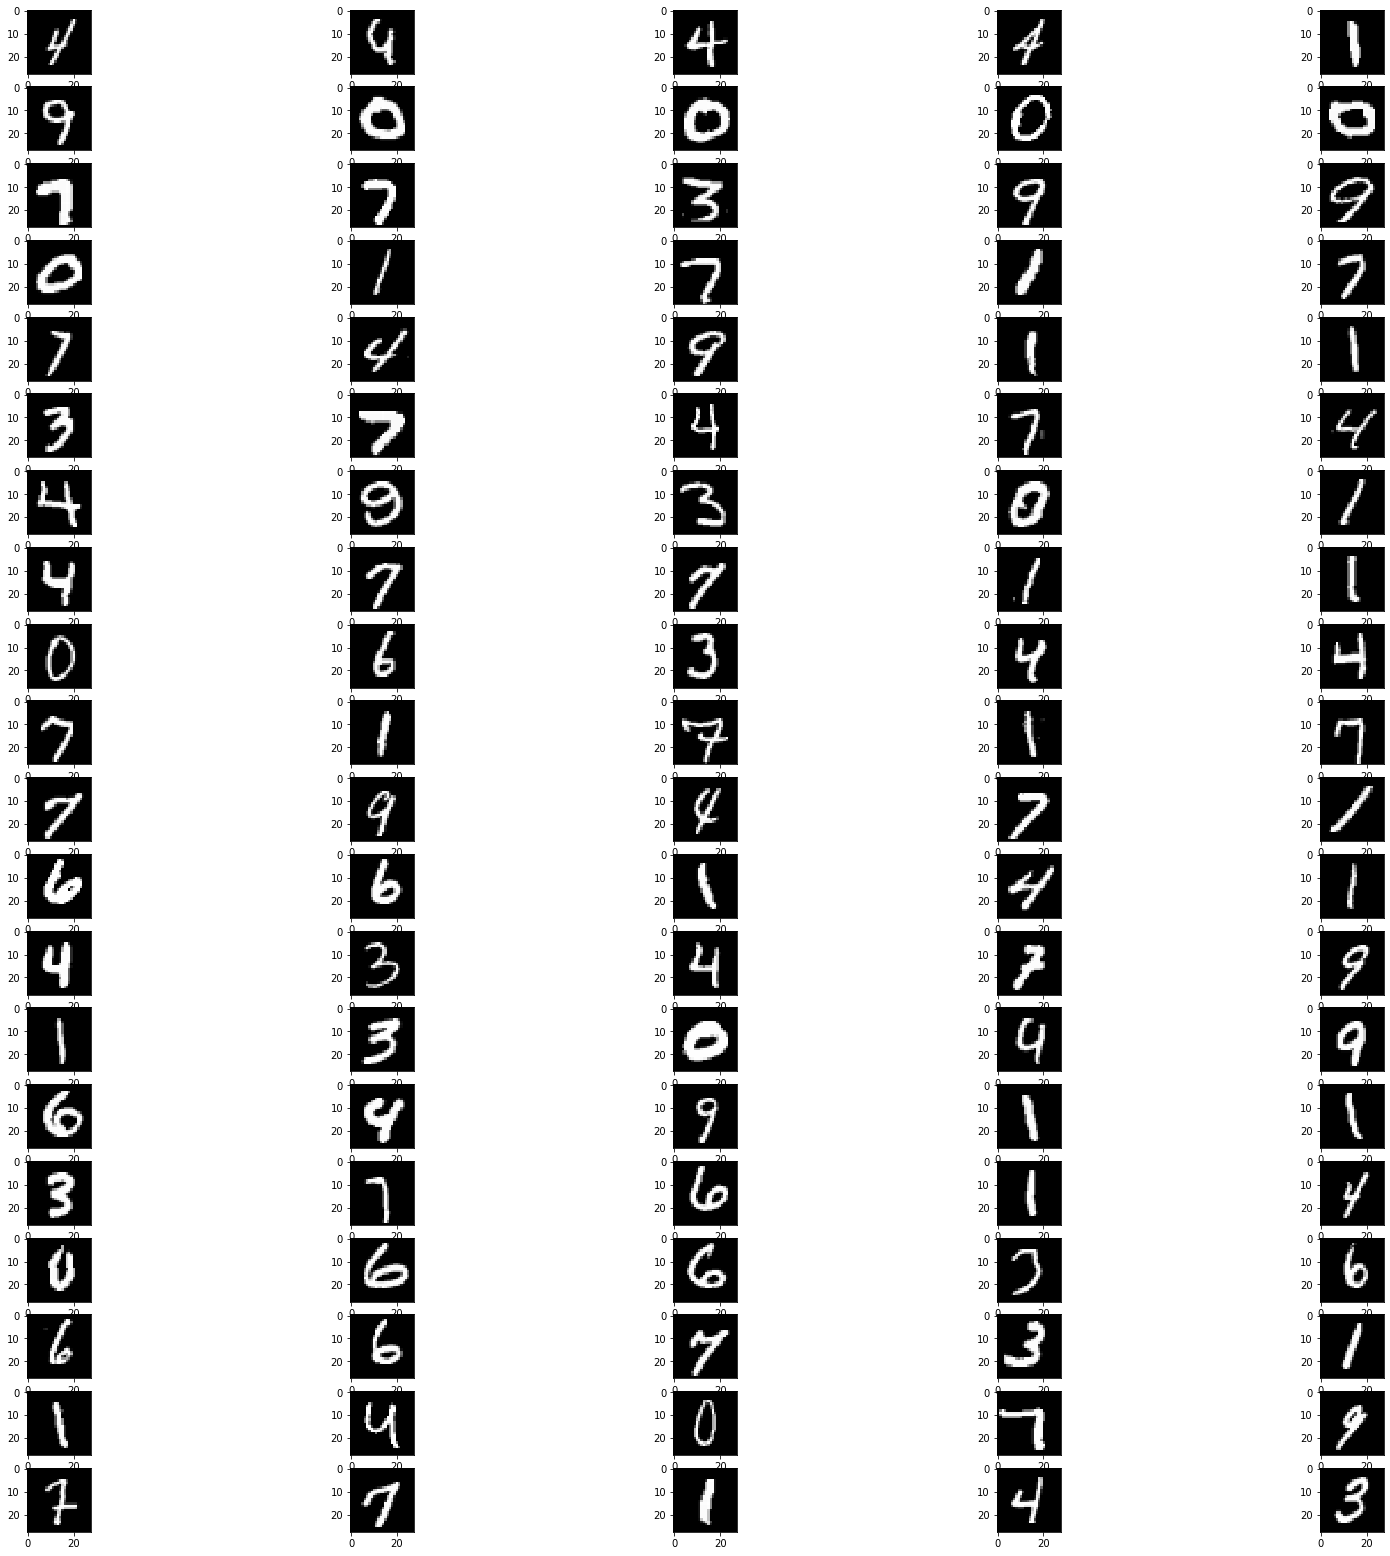

In [10]:
import matplotlib.pyplot as plt
plt.set_cmap('gray')

fig=plt.figure(figsize=(28, 28))
columns = 5
rows = 20
for i in range(0, columns*rows):
    img = samples[i]
    img = img.reshape(28,28)
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
plt.show()

Dabei fällt auf:
- Die Ziffern 2,5 und 8 kommen gar nicht vor. 
- 7er sind meistens amerikanisch gezeichnet (ohne horizontalen Strich) nur 2 sind mit Strich
- auch die meisten 1en sind nur als Strich gezeichnet (ohen Serifen und schrägen Strich)


In [11]:
#Vorkommen der Labels im Datenset
dataframe.set_index(['Label']).groupby(level='Label').size() 

Label
0    10
1    20
3    10
4    20
6    10
7    20
9    10
dtype: int64

## Prediction

Als nächstes lasse ich beide Models alle Samples vorhersagen 

In [12]:
predictionA = modelA.predict(samples)
predictionB = modelB.predict(samples)

## Model 

Um die Bilder dem richtigen Model zuzuweisen vergleiche ich, ob die Vorhersage der Models mit dem Label übereinstimmt und mit welcher Confidence das Model die Vorhersage getätigt hat.
Dazu füge ich die Werte meinem Datenframe hinzu.

- Wenn nur ein Model einen richtige prediction getätigt hat füge ich es dem hinzu 
- Wenn beide Models richtig predicted haben gehe ich nach der Confidence

In [13]:
def fillDataframe(dataframe, n_sample, predictionA, predictionB):
    for n in range (0,n_sample):
        dataframe['Prediction A'][n] = predictionA[n].argmax()
        dataframe['Confidence A'][n] = predictionA[n].max()
        dataframe['Prediction B'][n] = predictionB[n].argmax()
        dataframe['Confidence B'][n] = predictionB[n].max()
        dataframe['Diff'][n]=abs(predictionA[n].max()-predictionB[n].max())
        if dataframe['Prediction A'][n] == dataframe['Label'][n]:
            dataframe['Prediction A bool'][n] = True
        else:
            dataframe['Prediction A bool'][n] = False
        if dataframe['Prediction B'][n]== dataframe['Label'][n]:
            dataframe['Prediction B bool'][n] = True
        else:
            dataframe['Prediction B bool'][n] = False
        if dataframe['Prediction A bool'][n] and dataframe['Prediction B bool'][n]:
            #both true
            if dataframe['Confidence A'][n]== dataframe['Confidence B'][n]:
                dataframe['Model'][n] = 'unknown 1'
            elif dataframe['Confidence A'][n] > dataframe['Confidence B'][n]:
                dataframe['Model'][n] = 'A'
            else: 
                dataframe['Model'][n] = 'B'
        elif dataframe['Prediction A bool'][n]:
            #only A true
            dataframe['Model'][n] = 'A'
        elif dataframe['Prediction B bool'][n]:
            #only B true
            dataframe['Model'][n] = 'B'
        else:
            # both false
            dataframe['Model'][n] = 'unknown 2'
    return dataframe

In [14]:
dataframe = fillDataframe(dataframe,100, predictionA, predictionB)

In [15]:
dataframe

,Label,Prediction A,Prediction A bool,Confidence A,Prediction B,Prediction B bool,Confidence B,Diff,Model
0,4,4,True,0.914831,4,True,0.997671,0.082840,B
1,4,4,True,0.998899,4,True,0.998726,0.000174,A
2,4,4,True,0.989907,4,True,0.997815,0.007908,B
3,4,4,True,0.950326,4,True,0.998840,0.048515,B
4,1,1,True,0.981299,1,True,0.999455,0.018156,B
...,...,...,...,...,...,...,...,...,...
95,7,7,True,0.961590,1,False,0.388082,0.573508,A
96,7,7,True,0.975617,7,True,0.964225,0.011392,A
97,1,1,True,0.993747,1,True,0.998958,0.005212,B
98,4,4,True,0.981844,4,True,0.999803,0.017960,B


Meine erste Zuordnung zeigt, dass mehr Samples Model B zugeordnet wurden. 

In [16]:
labels = dataframe.set_index(['Model']).groupby(level='Model').size() 
labels

Model
A    32
B    68
dtype: int64

In [17]:
leftA = 50 - labels[0]
leftA

18

Deshalb weise ich nun die Samples die zwar B zugeordnete wurden aber bei denen die Confidence von A möglichst hoch ist und die Confidence von B am geringsten. Dabei muss A trotzdem eine richtige Vorhersage getroffen haben und es darf nicht bereits A zugeordnet sein.

In [18]:
predictionA_true = dataframe['Prediction A bool'] == True
not_already_A = dataframe['Model']!= 'A'
dataframe_orderBy_Diff = dataframe[predictionA_true & not_already_A ]
#Sort by highest Confidence A and low Confidence B
dataframe_orderBy_Diff = dataframe_orderBy_Diff.sort_values(by=['Confidence A','Confidence B'], ascending=[False,True])
index = dataframe_orderBy_Diff.index[:leftA]
for idx in index:
    dataframe['Model'][idx]= 'A'

In [19]:
dataframe.set_index(['Model']).groupby(level='Model').size() 

Model
A    50
B    50
dtype: int64

In [20]:
dataframe_orderBy_Diff

,Label,Prediction A,Prediction A bool,Confidence A,Prediction B,Prediction B bool,Confidence B,Diff,Model
56,6,6,True,0.999865,6,True,0.999943,0.000078,B
86,6,6,True,0.999816,6,True,0.999914,0.000098,B
35,4,4,True,0.999477,4,True,0.999839,0.000362,B
44,4,4,True,0.999212,4,True,0.999693,0.000482,B
82,6,6,True,0.999053,6,True,0.999840,0.000787,B
6,0,0,True,0.998863,0,True,0.999705,0.000842,B
15,0,0,True,0.998571,0,True,0.999869,0.001298,B
62,4,4,True,0.998178,4,True,0.999902,0.001723,B
32,3,3,True,0.997126,3,True,0.999509,0.002382,B
26,7,7,True,0.996273,7,True,0.999533,0.003260,B


Nun sind sowohl Model A als auch B jeweils 50 samples zugeordnet. Auch wenn die Sicherheit gerade bei den zuletzt zugeordneten samples gering ist. 

## Task B - Solution

Um herauszufinden in wie weit die Model imbalanced sind, untersuche ich die Anzahl der richtig/falsch vorhergesagten Labels und die damit verbundene durchschnittliche Confidence.

In [21]:
def auswertungDataframe(dataframe): 
    #2-dimensional list with every label 
    # 0 Amount right predicted
    # 1 Avg Confidence prediction
    # 2 Amount wrong predicted
    # 3 Avg Confidence wrong prediction
    modelA_label = np.zeros((10,4))
    modelB_label = np.zeros((10,4))
    modelA_label.shape

    for row in dataframe.itertuples():

        label = row[1]

        #determine for Model A
        if row[3]:#Prediction A bool
            modelA_label[label][0]+= int(1)
            modelA_label[label][1]+= row[4]#Confidence A
        else:
            modelA_label[label][2]+= 1
            modelA_label[label][3]+= row[4]

            #determine for Model B
        if row[6]:#Prediction B bool
            modelB_label[label][0]+= 1
            modelB_label[label][1]+= row[7]#Confidence B
        else:
            modelB_label[label][2]+= 1
            modelB_label[label][3]+= row[7]

    print("Results: ")
    print("-----------------------------------------")
    for n in range(0,10):
        #if n == 2 or n == 5 or n == 8:
        #    continue

        if modelA_label[n][0]!=0:
            modelA_label[n][1]= modelA_label[n][1]/modelA_label[n][0]
        if modelA_label[n][2]!=0:
            modelA_label[n][3]= modelA_label[n][3]/modelA_label[n][2]
        if modelB_label[n][0]!=0:
            modelB_label[n][1]= modelB_label[n][1]/modelB_label[n][0]
        if modelB_label[n][2]!=0:
            modelB_label[n][3]= modelB_label[n][3]/modelB_label[n][2]

        print("Label: " +str(n) )
        print("Model A right: "+ str(int(modelA_label[n][0]))+" with AVG Confidence: "+str(round(modelA_label[n][1],2)))
        print("Model A wrong: "+ str(int(modelA_label[n][2]))+" with AVG Confidence: "+str(round(modelA_label[n][3],2)))
        print("Model B right: "+ str(int(modelB_label[n][0]))+" with AVG Confidence: "+str(round(modelB_label[n][1],2)))
        print("Model B wrong: "+ str(int(modelB_label[n][2]))+" with AVG Confidence: "+str(round(modelB_label[n][3],2)))
        print("-----------------------------------------")


In [22]:
auswertungDataframe(dataframe)

Results: 
-----------------------------------------
Label: 0
Model A right: 9 with AVG Confidence: 0.96
Model A wrong: 1 with AVG Confidence: 0.9
Model B right: 10 with AVG Confidence: 0.98
Model B wrong: 0 with AVG Confidence: 0.0
-----------------------------------------
Label: 1
Model A right: 19 with AVG Confidence: 0.97
Model A wrong: 1 with AVG Confidence: 0.46
Model B right: 19 with AVG Confidence: 0.97
Model B wrong: 1 with AVG Confidence: 0.7
-----------------------------------------
Label: 2
Model A right: 0 with AVG Confidence: 0.0
Model A wrong: 0 with AVG Confidence: 0.0
Model B right: 0 with AVG Confidence: 0.0
Model B wrong: 0 with AVG Confidence: 0.0
-----------------------------------------
Label: 3
Model A right: 9 with AVG Confidence: 0.99
Model A wrong: 1 with AVG Confidence: 0.56
Model B right: 8 with AVG Confidence: 0.95
Model B wrong: 2 with AVG Confidence: 0.75
-----------------------------------------
Label: 4
Model A right: 18 with AVG Confidence: 0.93
Model A

Generell sind die Ergebnisse von Model A und B ziemlich ähnlich. Sie unterscheiden sich in absoluten Zahlen um maximal 1 richtig/falsch vorhergesagtes Bild mehr oder weniger.
Die Confidence mit der sie diese Vorhersage im durchschnitt tätigen unterscheidet sich da jedoch deutlicher.

#### Zusammenfassung Richtige Vorhersage: 
- Die Confidence der Models bei der richtigen Vorhersage sind ziemlich ähnlich und generell ziemlich hoch 
- Model A zeigt bei Label 3 höhere Confidence deshalb ist es wahrscheinlich auf mehr 3en trainiert worden
- Model B zeigt bei Label 4 höhere Confidence und ist deshalb wahrscheinlich mehr auf 4ren trainiert worden
- Model B zeigt bei Label 7 leicht höhere Confidence und ist deshalb wahrscheinlich auf etwas mehr 7enern trainiert worden
- Beide Models haben fasst 100 Prozent Confidence bei Label 0,1 und 6
- Bei Label 9 weisen beide Models eine relativ geringe Confidence auf (im Vergleich zu den anderen Labels), deshalb gab es davon wahrscheinlich weniger Bilder im Trainingsset
- Über die Labels 2, 5 und 8 kann ich keine Aussage treffen, da sie nicht in den Sampels vorkamen

#### Zusammenfassung Falsche Vorhersage: 
- Die Confidencen der falsch Vorhergesagten Labels schwanken deutlich und sind auch teilweise sehr hoch 
- Label 0 wurde mit sehr geringer Confidence oder gar nicht falsch vorhergesagt. Beide Models sind demnach auf vielen 0en trainiert worden
- Label 1 Model A und B haben 1mal falsch vorhergesagt. Model B mit deutlich geringerer Confidence
- Label 3 wurde von Model A mit deutlich geringerer Confidence falsch vorhergesagt
- Label 4 wurde von Model B überhaupt nicht falsch vorhergesagt
- Label 6 wurde von keinem Model falsch vorhergesagt
- Label 7 wurde von Model B zwar öfter falsch vorhergesagt aber mit sehr geringer Confidence
- Label 9 wurde von beiden oft und mit hoher Confidence falsch vorhergesagt

Niedrige Confidence bedeutet, dass sich das Model nicht sehr sicher ist bei der vorhersage deshalb ist in diesem fall eine falsch vorhersage weniger "schlimm", da das Model dazusagt, dass es sich nicht sicher ist.

In [23]:
A_false = dataframe['Prediction A bool']==False
B_false = dataframe['Prediction B bool']==False

In [24]:
dataframe[A_false]

,Label,Prediction A,Prediction A bool,Confidence A,Prediction B,Prediction B bool,Confidence B,Diff,Model
5,9,3,False,0.425110,9,True,0.997847,0.572737,B
21,4,6,False,0.534773,4,True,0.999876,0.465103,B
31,9,3,False,0.950036,9,True,0.992922,0.042886,B
52,4,9,False,0.356835,4,True,0.990281,0.633446,B
57,1,6,False,0.461221,1,True,0.998788,0.537568,B
63,7,9,False,0.934169,7,True,0.960790,0.026622,B
80,0,6,False,0.900113,0,True,0.935014,0.034900,B
88,3,0,False,0.556947,3,True,0.999134,0.442186,B


In [25]:
dataframe[A_false]['Confidence A'].mean()

0.6399004869163036

In [26]:
dataframe[A_false]['Confidence B'].mean()

0.9843315780162811

In [27]:
dataframe[B_false]

,Label,Prediction A,Prediction A bool,Confidence A,Prediction B,Prediction B bool,Confidence B,Diff,Model
12,3,3,True,0.998808,4,False,0.794172,0.204636,A
20,7,7,True,0.957289,9,False,0.364069,0.593220,A
25,3,3,True,0.998692,9,False,0.696836,0.301856,A
51,9,9,True,0.993291,4,False,0.955951,0.037340,A
54,1,1,True,0.977586,4,False,0.701469,0.276117,A
69,9,9,True,0.996327,4,False,0.982854,0.013473,A
95,7,7,True,0.961590,1,False,0.388082,0.573508,A


In [28]:
dataframe[B_false]['Confidence A'].mean()

0.9833689246858869

In [29]:
dataframe[B_false]['Confidence B'].mean()

0.6976330748626164

Bei Betrachtung des Durchschnitts der von einem Model der falsch vorhergesagten Samples kommen gesamtbetrachtet sehr ähnliche Werte raus.

### Vergleich MNIST Datenset

Da die Labels 2,5 und 8 in den Samples nicht vorkamen werde ich weitere Sampels aus dem MNIST Datenset predicten lassen und die Ergebnisse davon vergleichen

In [30]:
np.random.seed(1337)
n_sample = 10000
idx = np.random.randint(Y.shape[0], size=n_sample)
X_sample = X[idx]
Y_sample = Y[idx]

In [31]:
samples.shape

(100, 28, 28, 1)

In [32]:
X_sample.shape

(10000, 28, 28)

Da den Bildern aus dem MNIST ein Dimension fehlen füge ich eine Dimension bestehend aus 0en hinzu und berechne anschließend die passenden Werte.

In [33]:
samples_mnist = X_sample[..., np.newaxis]

In [34]:
samples_mnist = (samples_mnist[:, :, :, :] / 255).astype(float)

In [35]:
samples_mnist.shape

(10000, 28, 28, 1)

Auch für die MNIST Daten führe ich die prediction aus, erstelle ein Datenframe und fülle es mit den gleichen Daten wie bereits oben.

In [36]:
mnist_prediction_A = modelA.predict(samples_mnist)
mnist_prediction_B = modelB.predict(samples_mnist)

In [37]:
helper = np.zeros(shape=(n_sample,9))
mnist_data =  pd.DataFrame(helper,columns=['Label', 'Prediction A','Prediction A bool','Confidence A','Prediction B','Prediction B bool','Confidence B','Diff','Model' ])

datatypes = {'Label':'int32',
             'Prediction A':'int32',
             'Prediction A bool':'bool',
             'Confidence A':'float64',
             'Prediction B':'int32',
             'Prediction B bool':'bool',
             'Confidence B':'float64',
             'Diff':'float64',
             'Model':'object'}

mnist_data = mnist_data.astype(datatypes)

In [38]:
for n in range(0, n_sample):
    mnist_data['Label'][n] = Y_sample[n];

In [39]:
mnist_data = fillDataframe(mnist_data, n_sample, mnist_prediction_A, mnist_prediction_B)

In [40]:
mnist_data

,Label,Prediction A,Prediction A bool,Confidence A,Prediction B,Prediction B bool,Confidence B,Diff,Model
0,7,7,True,0.987952,7,True,0.998313,0.010361,B
1,3,3,True,0.875504,3,True,0.572978,0.302525,A
2,9,3,False,0.694461,3,False,0.968902,0.274441,unknown 2
3,0,0,True,0.951266,0,True,0.999070,0.047804,B
4,9,4,False,0.730099,4,False,0.806268,0.076169,unknown 2
...,...,...,...,...,...,...,...,...,...
9995,3,3,True,0.989624,3,True,0.999292,0.009669,B
9996,4,4,True,0.616140,4,True,0.526632,0.089508,A
9997,9,9,True,0.993812,9,True,0.994480,0.000668,B
9998,5,6,False,0.712110,7,False,0.482580,0.229531,unknown 2


In [41]:
mnist_data.set_index(['Model']).groupby(level='Model').size() 

Model
A            2694
B            3980
unknown 2    3326
dtype: int64

unknown 1 = Confidence gleich

unknown 2 = Beide Models haben eine falsche vorhesage getätigt

In [42]:
mnist_data.set_index(['Label']).groupby(level='Label').size() 

Label
0     981
1    1095
2     958
3     986
4     988
5     918
6    1002
7    1035
8    1036
9    1001
dtype: int64

In [43]:
auswertungDataframe(mnist_data)

Results: 
-----------------------------------------
Label: 0
Model A right: 939 with AVG Confidence: 0.93
Model A wrong: 42 with AVG Confidence: 0.65
Model B right: 955 with AVG Confidence: 0.97
Model B wrong: 26 with AVG Confidence: 0.61
-----------------------------------------
Label: 1
Model A right: 1045 with AVG Confidence: 0.92
Model A wrong: 50 with AVG Confidence: 0.61
Model B right: 961 with AVG Confidence: 0.94
Model B wrong: 134 with AVG Confidence: 0.59
-----------------------------------------
Label: 2
Model A right: 0 with AVG Confidence: 0.0
Model A wrong: 958 with AVG Confidence: 0.74
Model B right: 0 with AVG Confidence: 0.0
Model B wrong: 958 with AVG Confidence: 0.75
-----------------------------------------
Label: 3
Model A right: 814 with AVG Confidence: 0.9
Model A wrong: 172 with AVG Confidence: 0.68
Model B right: 812 with AVG Confidence: 0.91
Model B wrong: 174 with AVG Confidence: 0.71
-----------------------------------------
Label: 4
Model A right: 779 with 

In [44]:
mnist_data.mean()

Label                4.506500
Prediction A         4.202000
Prediction A bool    0.609000
Confidence A         0.827039
Prediction B         4.211700
Prediction B bool    0.591600
Confidence B         0.856380
Diff                 0.144698
dtype: float64

Da die Anzahl der Sampels nun deutlich größer ist, kann ich nach dem Gesetz der großen Zahlen bessere Aussagen über die Balance des Trainingsset der beiden Models machen.

### Ergebnisse

- Keine 2,5 oder 8 wurde richtig vorhergesagt
- Oft sind die Confidencen ähnlich aber die absoluten Zahlen der richtig bzw falsch vorhergesagten Bilder weisen größere Unterschiede auf.
- Model A hat Label 1,6 und 9 besser vorraussgesagt
- Model B hat Label 4 und 7 besser vorraussgesagt
- Model B hat Label 0 leicht besser vorrausgesagt
- Beide Models haben bei Label 3 ziemlich ähnliche Werte (gegensätzlich zu meiner ursprünglichen Ergebnissen)

Eine besser Vorhersage bedeutet, dass eine höhere Anzahl an Bildern richtig und eine geringere Anzahl falsch vorhergesagt wurde. Außerdem dass die Confidence der richtig vorhergesagten Bildern möglichst hoch und die der falsch vorhergesagten Bildern möglichst niedrig ist.


### Vergleich mit einem Model aus einer vorherigen Aufgabe 



Da ich davon ausgehe, dass beide Models auf relativ ähnlichen Trainingsdaten trainiert wurden vergleiche ich sie mit einem weiteren Model.

Im Folgenden vergleiche ich die Ergebnisse mit den Ergebnissen von einem Model, dass ich im Internet gefunden habe.<br>
(Quelle = https://www.kaggle.com/nadanai263/mnist-with-keras-template )

Um nicht alle Funktionen neuschreiben zu müssen vergleiche ich das Model C mit dem Model A. <br>
(Achtung! Missverständliche Beschriftung alles was B ist ist jetzt C)

In [45]:
from keras.models import model_from_json
# load json and create model
json_file = open('CNN1_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
modelC = model_from_json(loaded_model_json)
# load weights into new model
modelC.load_weights("CNN1_bestweights.h5")
print("Loaded model from disk")

Loaded model from disk


In [46]:
predictionC = modelC.predict(samples)

In [47]:
helper = np.zeros(shape=(100,9))
modelC_data =  pd.DataFrame(helper,columns=['Label', 'Prediction A','Prediction A bool','Confidence A','Prediction B','Prediction B bool','Confidence B','Diff','Model' ])

datatypes = {'Label':'int32',
             'Prediction A':'int32',
             'Prediction A bool':'bool',
             'Confidence A':'float64',
             'Prediction B':'int32',
             'Prediction B bool':'bool',
             'Confidence B':'float64',
             'Diff':'float64',
             'Model':'object'}

modelC_data = modelC_data.astype(datatypes)

In [48]:
#fill dataframe with labels from first dataframe
for n in range(0, 100):
    modelC_data['Label'][n] = dataframe['Label'][n];

In [49]:
modelC_data = fillDataframe(modelC_data, 100, predictionA, predictionC)
modelC_data

,Label,Prediction A,Prediction A bool,Confidence A,Prediction B,Prediction B bool,Confidence B,Diff,Model
0,4,4,True,0.914831,4,True,1.000000,0.085169,B
1,4,4,True,0.998899,4,True,0.884174,0.114725,A
2,4,4,True,0.989907,4,True,1.000000,0.010093,B
3,4,4,True,0.950326,4,True,0.999912,0.049586,B
4,1,1,True,0.981299,1,True,0.999999,0.018700,B
...,...,...,...,...,...,...,...,...,...
95,7,7,True,0.961590,7,True,0.999851,0.038261,B
96,7,7,True,0.975617,7,True,1.000000,0.024383,B
97,1,1,True,0.993747,1,True,1.000000,0.006253,B
98,4,4,True,0.981844,4,True,1.000000,0.018156,B


In [50]:
modelC_data.set_index(['Model']).groupby(level='Model').size() 

Model
A     2
B    98
dtype: int64

In [51]:
modelC_data[modelC_data['Model']=='A']

,Label,Prediction A,Prediction A bool,Confidence A,Prediction B,Prediction B bool,Confidence B,Diff,Model
1,4,4,True,0.998899,4,True,0.884174,0.114725,A
68,4,4,True,0.660763,9,False,0.830139,0.169376,A


In [52]:
auswertungDataframe(modelC_data)

Results: 
-----------------------------------------
Label: 0
Model A right: 9 with AVG Confidence: 0.96
Model A wrong: 1 with AVG Confidence: 0.9
Model B right: 10 with AVG Confidence: 1.0
Model B wrong: 0 with AVG Confidence: 0.0
-----------------------------------------
Label: 1
Model A right: 19 with AVG Confidence: 0.97
Model A wrong: 1 with AVG Confidence: 0.46
Model B right: 20 with AVG Confidence: 1.0
Model B wrong: 0 with AVG Confidence: 0.0
-----------------------------------------
Label: 2
Model A right: 0 with AVG Confidence: 0.0
Model A wrong: 0 with AVG Confidence: 0.0
Model B right: 0 with AVG Confidence: 0.0
Model B wrong: 0 with AVG Confidence: 0.0
-----------------------------------------
Label: 3
Model A right: 9 with AVG Confidence: 0.99
Model A wrong: 1 with AVG Confidence: 0.56
Model B right: 10 with AVG Confidence: 1.0
Model B wrong: 0 with AVG Confidence: 0.0
-----------------------------------------
Label: 4
Model A right: 18 with AVG Confidence: 0.93
Model A wr

Nun vergleiche ich Model B mit Model C. Dabei ist Model A = Model B und Model B = Model C!

In [53]:
modelC_data = fillDataframe(modelC_data, 100, predictionB, predictionC)
modelC_data

,Label,Prediction A,Prediction A bool,Confidence A,Prediction B,Prediction B bool,Confidence B,Diff,Model
0,4,4,True,0.997671,4,True,1.000000,0.002329,B
1,4,4,True,0.998726,4,True,0.884174,0.114552,A
2,4,4,True,0.997815,4,True,1.000000,0.002185,B
3,4,4,True,0.998840,4,True,0.999912,0.001071,B
4,1,1,True,0.999455,1,True,0.999999,0.000544,B
...,...,...,...,...,...,...,...,...,...
95,7,1,False,0.388082,7,True,0.999851,0.611769,B
96,7,7,True,0.964225,7,True,1.000000,0.035775,B
97,1,1,True,0.998958,1,True,1.000000,0.001041,B
98,4,4,True,0.999803,4,True,1.000000,0.000197,B


In [54]:
modelC_data.set_index(['Model']).groupby(level='Model').size() 

Model
A     3
B    97
dtype: int64

In [55]:
auswertungDataframe(modelC_data)

Results: 
-----------------------------------------
Label: 0
Model A right: 10 with AVG Confidence: 0.98
Model A wrong: 0 with AVG Confidence: 0.0
Model B right: 10 with AVG Confidence: 1.0
Model B wrong: 0 with AVG Confidence: 0.0
-----------------------------------------
Label: 1
Model A right: 19 with AVG Confidence: 0.97
Model A wrong: 1 with AVG Confidence: 0.7
Model B right: 20 with AVG Confidence: 1.0
Model B wrong: 0 with AVG Confidence: 0.0
-----------------------------------------
Label: 2
Model A right: 0 with AVG Confidence: 0.0
Model A wrong: 0 with AVG Confidence: 0.0
Model B right: 0 with AVG Confidence: 0.0
Model B wrong: 0 with AVG Confidence: 0.0
-----------------------------------------
Label: 3
Model A right: 8 with AVG Confidence: 0.95
Model A wrong: 2 with AVG Confidence: 0.75
Model B right: 10 with AVG Confidence: 1.0
Model B wrong: 0 with AVG Confidence: 0.0
-----------------------------------------
Label: 4
Model A right: 20 with AVG Confidence: 0.97
Model A wr

In [56]:
modelC_data[modelC_data['Model']=='A']

,Label,Prediction A,Prediction A bool,Confidence A,Prediction B,Prediction B bool,Confidence B,Diff,Model
1,4,4,True,0.998726,4,True,0.884174,0.114552,A
68,4,4,True,0.997650,9,False,0.830139,0.167511,A
71,4,4,True,0.998807,4,True,0.998755,0.000052,A


Nach diesem Vergleich ist eindeutig, dass das Model C aus dem Internet bei allen Labels deutlich bessere Ergebnisse liefert als Model A und B.Deswegen ist es auch schwierig die Model zu vergleichen.<br>

Was auch aufällt ist, dass nur bei 2 bzw. 3 Bilder mit Label 4 Model A oder Model B besser Abschneiden als Model C. Deswegen vermute ich, dass das Trainingsset von Model A und B auf überduchschnittlich vielen 4ren trainiert wurde.

Bei Label 9 schneiden Model A und B deutlich schlechter ab als Model C. Deswegen wurdenbeide wahrscheinlich auf unterduchschnittlich vielen 9en trainiert.

## Fazit

- Model A wurde wahrscheinlich auf mehr 1, 6 und 9 trainiert.
- Model B wurde wahrscheinlich auf mehr 4 und 7 trainiert.
- Beide Models sind wahrscheinlich auf ähnlich vielen 0en trainiert worden.
- Label 3 war am schwierigsten zu bestimmen, da die Ergebnisse teilweise wiedersprüchlich waren. Wahrscheinlich sind beide Models auf ähnlich vielen Bildern trainiert worden mit einer Tendenz dazu, dass A auf mehr 3en trainiert wurde.
- Beide Models wurden generell jedoch auf vielen 4ren und weniger 9en trainiert.
- Keins der Model wurde auf 2,5 oder 8 trainiert (oder nur sehr gering vertreten)

Trotzdem denke ich dass die Trainingssets beider Model ziemlich ähnlich balanciert sind oder sich sogar überschnitten haben, da zwar Tendenzen zu erkennen sind aber keine extremen Unterschiede

### Challenges A

Strikt nach den Werten die meine Untersuchungen geliefert haben würde ich bei mehr als 50 samples das Model B angeben. Da die Aufgabe jedoch verlangt, dass jedem Model 50 Bilder zugeordnet werden müssen musste ich Bildern dem Model A zuordnen die nach dem Vergleichen der Confidence eher zu B zugehörig sind. Deshalb hab ich mich dabei für die Bilder mit der höchsten Confidence von A und der geringsten Confidence von B entschieden, die trotzdem von A richtig erkannt wurden und nicht bereits A zugeordnet wurden.

### Challenges B 
Bei der weiteren Untersuchung der Ergebnisse konnte ich zwar eine Tendenz feststellen, aber keine. Deshalb habe ich versuch möglichst viele verschiedene Werte als Grundlage zu benutzen. <br>

Als ich versucht habe die Ergebnisse mit einem vorher trainierten Model zu testen ist mir aufgefallen dass Assignment 2 mit dem Cifar Datenset arbeitet und nicht mit dem MNIST Datenset, deshalb ist es nicht zum vergleich geeignet. 

Ich habe danach Models im Internet rausgesucht. Es fiehl mir jedoch schwer zu bewerten ob ein Model geeignet war. Ich habe aber versucht ein relativ ausbalanciertes Model zu finden.
Danach fiehl es mir schwer die sampels richtig zu reshapen damit es mit dem Model aus dem Internet kompatibel war. 

Teilweise haben unterschiedliche Untersuchungen wiedersprüchliche Werte ergeben. Diese unterschiedlichen Werte zu bewerten und mich für ein Ergebniss zu entscheiden war schwierig, da ich keine Erfahrung habe welche Kennzahlen aussagekräftiger sind und welche eher normalen Schwankungen unterliegen

Im Großen und ganzen bin ich aber sehr zufrieden mit den Ergebnissen die ich herrausgefunden habe.